# Breast Cancer Using Principal Component Analysis

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer(as_frame = True)

In [4]:
df = cancer.frame

In [5]:
X = df[cancer['feature_names']]

### Standarization

We are using Z equation to do a standarization. The equation shows

$$Z = \frac{X - \mu}{\sigma}$$

In [6]:
X.mean()

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [7]:
X.std()

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

In [8]:
Z = (X - X.mean())/X.std()

### Create Covariance

Covariance (Pearson Correlaion) measures the strength of joint variability between two or more variables

In [9]:
c = Z.cov()

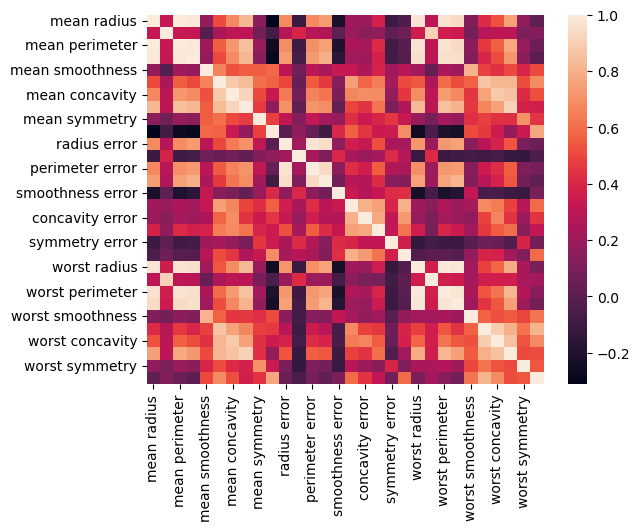

In [10]:
sns.heatmap(c)
plt.show()

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print ('eigenvalues:', eigenvalues)
print('eigenvalues shape:', eigenvalues.shape)
print('eigenvectors shape', eigenvectors.shape)


eigenvalues: [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
eigenvalues shape: (30,)
eigenvectors shape (30, 30)


In [12]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues =  eigenvalues[idx]

# sort of corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:, idx]

In [13]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [14]:
np.cumsum(eigenvalues)

array([13.28160768, 18.9729623 , 21.79091127, 23.77155175, 25.4202823 ,
       26.62763891, 27.30285902, 27.77947616, 28.19637097, 28.54706443,
       28.84098013, 29.1021415 , 29.34349899, 29.50050872, 29.59464368,
       29.67450648, 29.73390552, 29.7865243 , 29.8360019 , 29.8671613 ,
       29.89713419, 29.92457359, 29.94891443, 29.96696944, 29.98245071,
       29.99062835, 29.99752881, 29.99911815, 29.99986696, 30.        ])

In [15]:
n_components = np.argmax(explained_var >= 0.5) + 1
n_components

2

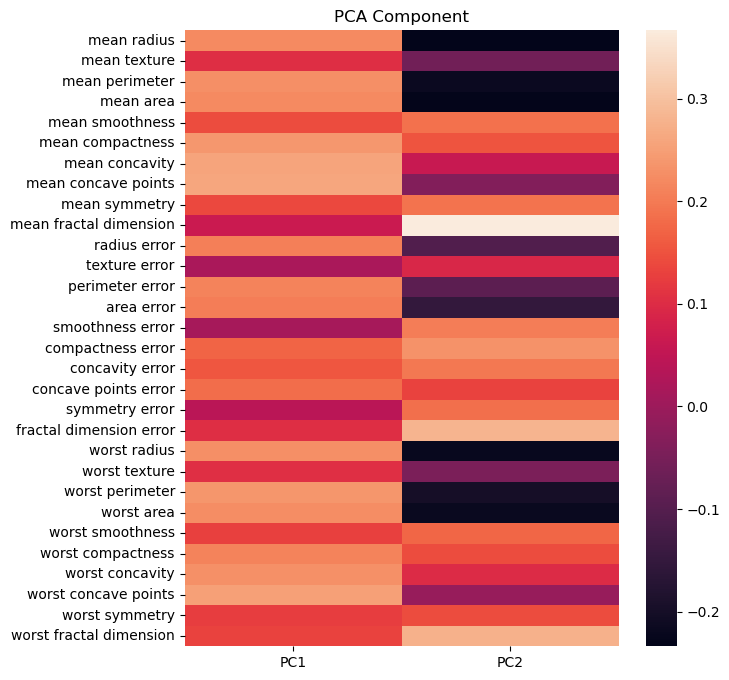

In [16]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_components =  pd.DataFrame(u, index = cancer['feature_names'], columns = ['PC1', 'PC2'])

# Plotting heatmap
plt.figure(figsize = (7,8))
sns.heatmap(pca_components)
plt.title('PCA Component')
plt.show()

In [17]:
# Matrix Multiplication
Z_pca = Z @ pca_components

#Rename the columns
Z_pca.rename({'PC1':'PCA1','PC2':'PCA2'}, axis = 1, inplace=True)

print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


In [18]:
data_z = pd.DataFrame(Z_pca)

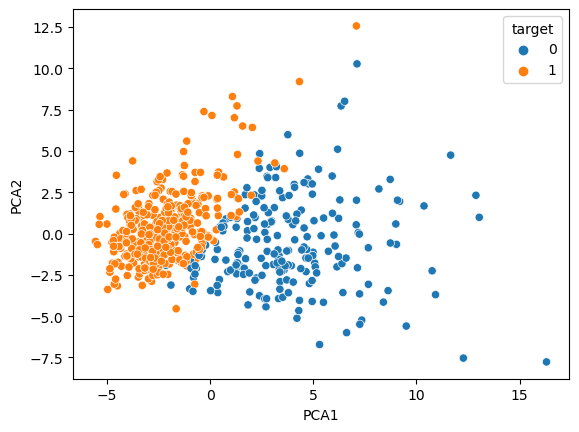

In [19]:
sns.scatterplot(x = data_z['PCA1'], y = data_z['PCA2'], hue = cancer['target'])
plt.show()

# LET'S TRY PREDICT BY USING THIS METHOD 

---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [2]:
cancer = load_breast_cancer (as_frame=True)

In [3]:
df = cancer.frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

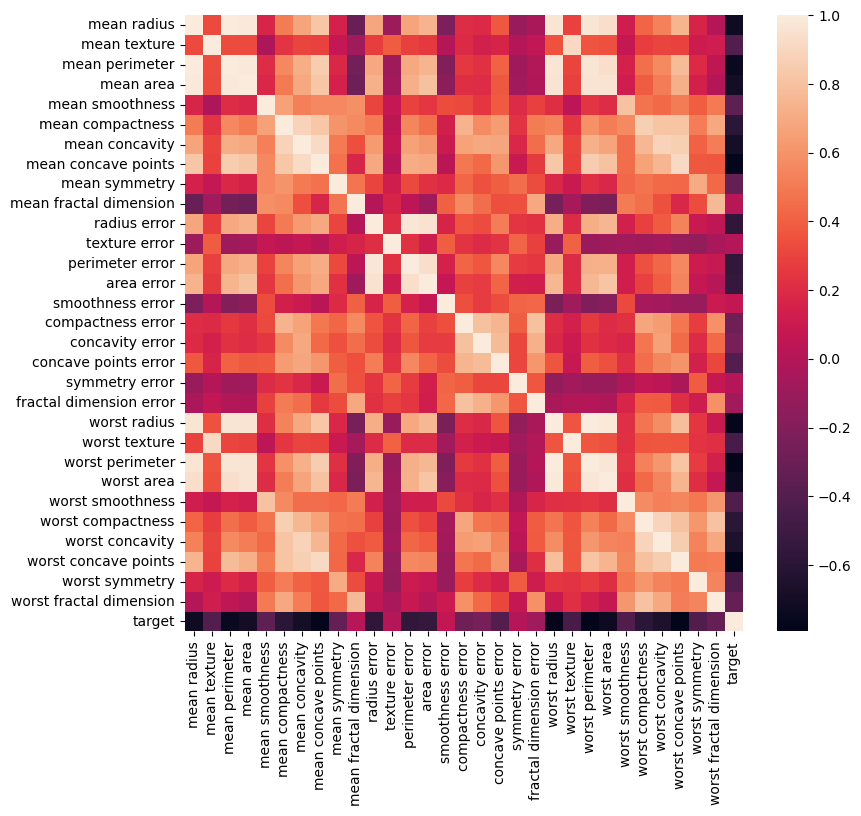

In [7]:
plt.figure(figsize = (9,8))
sns.heatmap(df.corr(), annot = False)
plt.show()

<Axes: >

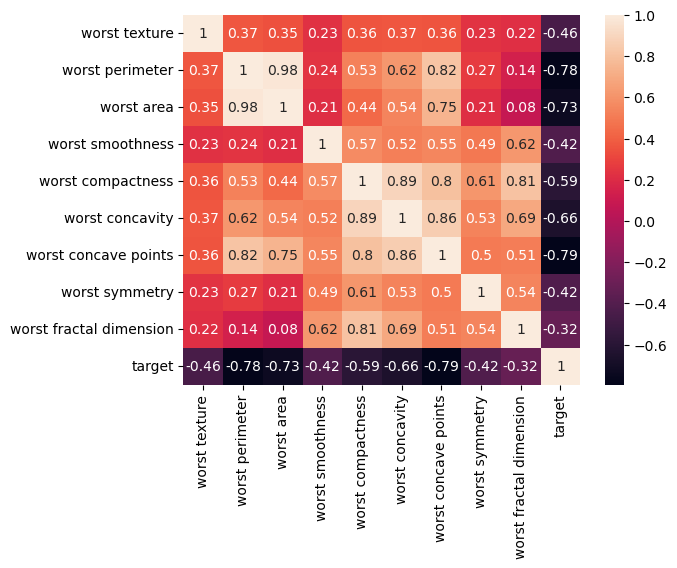

In [8]:
sns.heatmap(df.iloc[:,-10:].corr(), annot = True)

In [11]:
df.shape

(569, 31)

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
pca = PCA(n_components=2)

X = df.drop('target', axis = 1)
y = df.target

In [23]:
# fit transform data

X_scale = scaling.fit_transform(X)
X_pca = pca.fit_transform(X_scale)

In [25]:
X_pca.shape

(569, 2)

In [26]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca_components = pd.DataFrame(X_pca)

<Axes: xlabel='PCA1', ylabel='PCA2'>

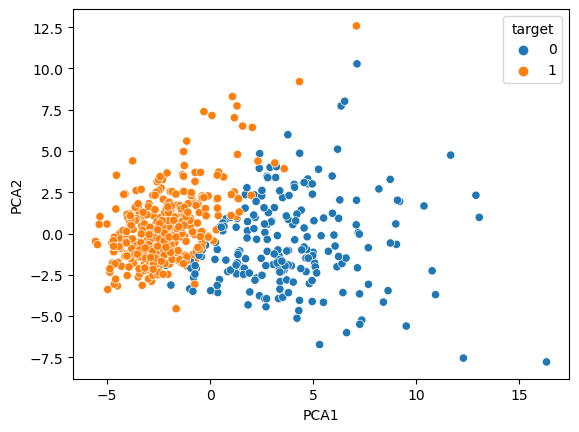

In [27]:
sns.scatterplot(x = df_pca['PCA1'], y = df_pca['PCA2'], hue = df.target)

In [28]:
#Evaluate the explained variance to understand how much information is retained by each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44272026, 0.18971182])

PCA1 had score 0.44 of variance, while PC2 had 0.19. 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X_pca, y, test_size=0.4)

clf = SGDClassifier()

In [37]:
clf.fit(X_train, y_train)

SGDClassifier()

In [38]:
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score (y_test, y_pred))

Accuracy:  0.9429824561403509


In [39]:
confusion_matrix(y_test, y_pred)

array([[ 85,   5],
       [  8, 130]], dtype=int64)

In [40]:
y_pred.shape

(228,)

In [41]:
y_test.shape

(228,)

In [54]:
result_series = pd.Series(y_pred)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


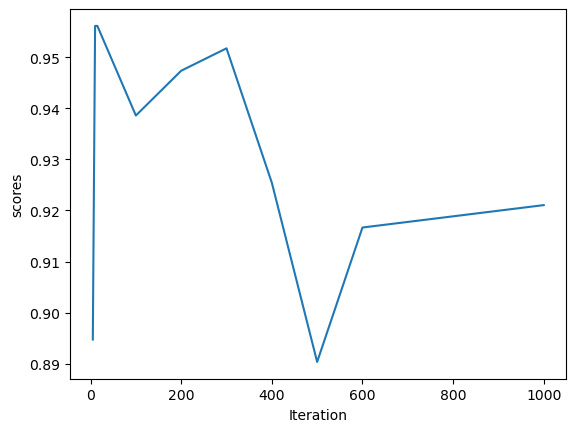

In [66]:
n_iters = [5,10,15,100,200,300,400,500,600,1000]
scores = []
for n in n_iters:
    clf = SGDClassifier(loss = 'log_loss', max_iter = n)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(n_iters, scores)
plt.xlabel('Iteration')
plt.ylabel('scores')
plt.show()

<Axes: >

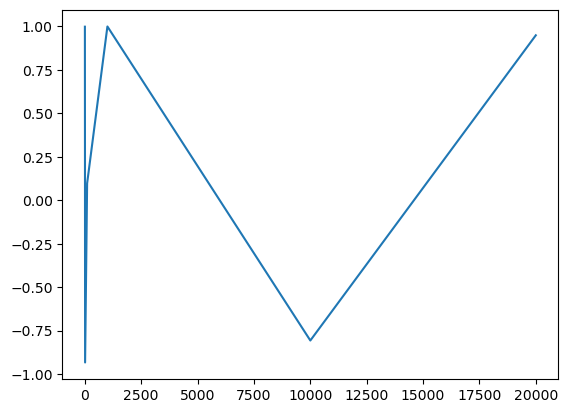

In [11]:
import numpy as np
import seaborn as sns
x = [1,10,100,1000,10000,20000]
y = []
for i in x:
    y_ = np.sin(np.pi/5 + i)
    y.append(y_)
    
sns.lineplot(x = x, y=y)